## PROJECT PROPOSAL: Predicted Chest Pain Type in Cleveland Ohio 
(Section 002, Group 31)

## Introduction

**Background:**
    Heart disease is the leading cause of death in the United States, including the city of Cleveland in Ohio. Factors that affect the probability of contracting heart disease include, unhealthy diet, high blood pressure, high cholesterol, minimal physical activity, etc. (“Heart disease,” 2022). While heart disease symptoms depend on the type of heart disease, many common symptoms include chest pain, shortness of breath, and pain in the neck, jaw, and throat. As noted, chest pain is often associated with heart disease. Particularly angina is a chest pain caused by poor blood flow to the heart due to the buildup of thick plaques on the inner walls of the arteries carrying blood to the heart, thereby restricting the heart’s blood (“Chest pain,” 2023). Several genetic and lifestyle factors contribute to the risk of developing angina. For example, there is evidence of a positive relationship between age and developing angina; an increase of plaque build up in the arteries is correlated with an increase in age (“Causes and risk,” n.d.).  

**Question:** Is it possible to predict chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) for a given heart disease patient based on various revelent medical factors and patient information?

**Variables of Interest:**
1. age (years)
2. sex (1=male; 0=female)
3. restbp = resting blood pressure. (mm Hg)
4. chol = serum cholesterol. (mg/dl)
6. thalach = maximum heart rate achieved.
7. exang = exercise-induced angina. (1=yes; 0=no)

**Dataset:** Cleveland Heart Disease Processed Data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

## Preliminary Data Analysis

Here, we will show that our dataset can be read from the web into R. We will also wrangle our data into a tidy format and visualize it. First, we will attach the necessary libraries.

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, we will read in the data (stored in our notebook) and add column names.

In [43]:
#read data here
data <- read_csv("processed.cleveland.data", col_names=FALSE)

heart_data <- data |> 
        rename(
            age = X1,
            sex = X2,
            cp = X3,
            restbp = X4,
            chol = X5,
            fbs = X6, 
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14) |>
        head(n=10)
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Below is a description of each of the columns of data and what the labels correspond to:

1. `age` (years)
2. `sex` (1=male; 0=female)
3. `cp` is chest pain type. (1=typical angina; 2=atypical angina; 3=non-anginal pain; 4=asymptomatic)
4. `restbp` is resting blood pressure. (mm Hg)
5. `chol` is serum cholesterol. (mg/dl)
6. `fbs` is whether fasting blood sugar is greater than 120 mg/dl. (1=yes; 0=no)
7. `restecg` is resting electrocardiographic results. (0=normal; 1=ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy)
8. `thalach` is maximum heart rate achieved.
9. `exang` is exercise-induced angina. (1=yes; 0=no) 
10. `oldpeak` is ST depression induced by exercise relative to rest.
11. `slope` is slope of the peak exercise ST segment. (1=upsloping; 2=flat, 3=downsloping)
12. `ca` is number of major vessels colored by flourosopy. (1-3)
13. `thal` is ?? (the website gave no information on its meaning). (3=normal, 6=fixed defect, 7=reversable defect)
14. `num` is diagnosis of heart disease. (0=<50% diameter narrowing, 1=>50% diameter narrowing)

We will not be using all of the data and variables to answer our research question, and some columns are untidy (categorical values are listed numerically, which may be unhelpful when trying to visualize and understand the data). Thus, we will tidy and wrangle the data we want in the coding cell below.

In [33]:
#clean and wrangle data
#filter data for variables (that we understand and want to experiment with) to be included in dataset
#mutate certain rows to have categorical values

filter_data <- heart_data|>
    select(cp, age, restbp, chol, thalach, sex, exang)|>
    mutate(cp = as_factor(cp))|>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang))|>
    head(n=10)
filter_data

cp,age,restbp,chol,thalach,sex,exang
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,63,145,233,150,1,0
4,67,160,286,108,1,1
4,67,120,229,129,1,1
3,37,130,250,187,1,0
2,41,130,204,172,0,0
2,56,120,236,178,1,0
4,62,140,268,160,0,0
4,57,120,354,163,0,1
4,63,130,254,147,1,0


In [17]:
#split data into training and testing
set.seed(2000)

heart_split <- initial_split(filter_data, prop = 0.75, strata=cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [51]:
#using training data, summarize data into tables of mean values and median values
count_cp <- heart_train|>
    group_by(cp)|>
    summarize(count = n())
count_cp

mean_variables <- heart_train |>
    group_by(cp) |>
    summarize(mean_age=mean(age, na.rm=TRUE),
             mean_restbp=mean(restbp, na.rm=TRUE),
             mean_chol=mean(chol, na.rm=TRUE),
             mean_thalach=mean(thalach, na.rm=TRUE))
mean_variables

median_variables <- heart_train |>
    group_by(cp) |>
    summarize(median_age=median(age, na.rm=TRUE),
             median_restbp=median(restbp, na.rm=TRUE),
             median_chol=median(chol, na.rm=TRUE),
             median_thalach=median(thalach, na.rm=TRUE))
median_variables



cp,count
<fct>,<int>
1,19
2,36
3,63
4,107


cp,mean_age,mean_restbp,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,56.52632,140.6316,239.7895,153.8421
2,50.25000,127.7500,235.8333,163.9722
3,54.69841,130.3968,244.4603,155.2063
4,55.25234,132.6636,250.4393,142.0093


cp,median_age,median_restbp,median_chol,median_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,140,234,155
2,51,128,225,165
3,54,130,240,157
4,57,130,248,143


In [19]:
library(RColorBrewer)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




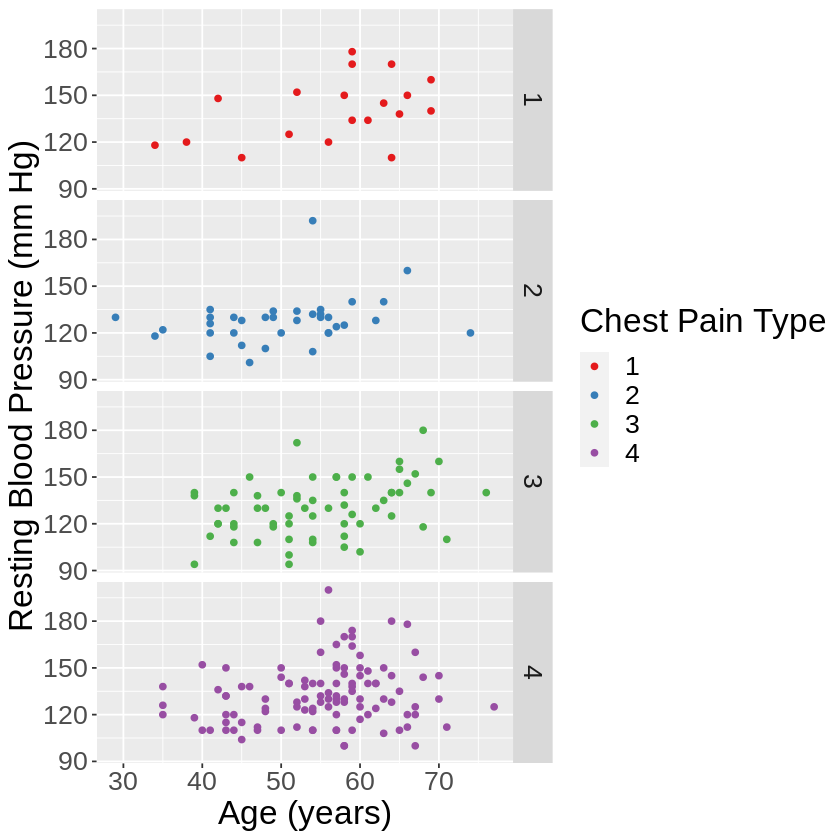

In [ ]:
#using training data, visualize data here

restbp_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= restbp, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Resting Blood Pressure (mm Hg)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
restbp_plot

chol_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= chol, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
chol_plot

thalach_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= thalach, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Maximum Heart Rate Achieved",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
thalach_plot           

As we can see, each plot does not show a clear distribution of data for the tested predictors. This could be for many possible reasons. We only used numeric predictors - perhaps other predictors, such as sex, could yield a more clear distribution. For our actual project, we will try including more predictors.

## Methods

**Conducting Data Analysis:**
1. Attach necessary libraries
2. Read in “processed Cleveland” data from https://archive.ics.uci.edu/ml/datasets/Heart+Disease, which is downloaded in the notebook
3. Tidy data
4. Split into training and testing set
5. Create recipe (scale any predictors if needed), knn specification (with tune, so we can find which *k* value to use), and classifier using training set
6. Perform cross-fold validations and test the metrics with various *k* values, then plot the data to find ideal *k* value
7. Once ideal *k* value is found (one that yields a high accuracy estimate), input that into a new specification and classifier
8. Create prediction classification (via recipe, new specification, and new classifier)
9. Evaluate the estimate accuracy of the classifier on the test set using the predict function

Variables used as predictors are: 
`age`, 
`resting blood pressure`, 
`cholesterol`, 
`electrocardiographic results`, 
`heart rate achieved`, 
`sex`, `fasting blood sugar amount`, and `exercise-induced angina`


**Visualizing results:** We will use a scatterplot graph, with chest pain colour-coded.

## Expected Outcomes and Significance

**We expect to find:**
We expect to predict the type of chest pain (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) a patient with heart disease/conditions could expect to have based on relevent medical factors and personal information as noted by the variables of interest listed above. 

#need to talk about what we expect to find based off of the graphs above

**What impact could our findings have?**
Predicting chest pain type and therefore the severity of the chest pain can provide the physician with the necessary information needed to treat the patient's heart disease. Further data analysis could describe which factor(s) directly lead to a certain chest pain type.

**What future questions could this lead to?**
- Is this classification model consistent with data in other parts of the world (eg. Hungary, Switzerland, etc)? 
- What other variables could be used in predicting chest pain that we havent already accounted for, and if those variables were added would that increase the estimate accuracy?
